<a href="https://colab.research.google.com/github/mikecchau/Bulldozer-time-series-price-prediction/blob/main/bulldozer_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git init
!git clone https://github.com/mikecchau/Bulldozer-time-series-price-prediction

Initialized empty Git repository in /content/.git/
Cloning into 'Bulldozer-time-series-price-prediction'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 38 (delta 14), reused 13 (delta 4), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # For suppressing warnings
warnings.filterwarnings("ignore")

In [3]:
%cd /content/Bulldozer-time-series-price-prediction

/content/Bulldozer-time-series-price-prediction


In [4]:
url = "https://media.githubusercontent.com/media/mikecchau/Bulldozer-time-series-price-prediction/main/Data/TrainAndValid.csv"

In [5]:
# Import dataset
df=pd.read_csv(url, low_memory=False)

## Exploratory data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

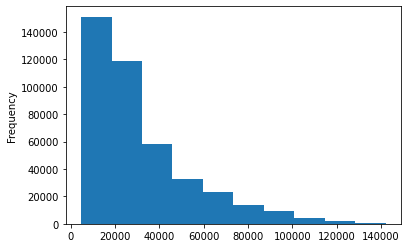

In [7]:
df.SalePrice.plot.hist()

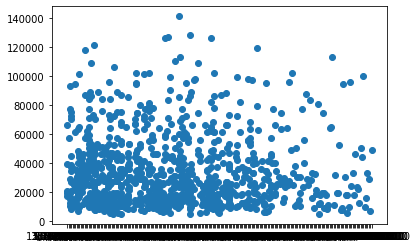

In [8]:
# Plot a snapshot of sale date vs. sale price
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [9]:
df['saledate'].dtype

dtype('O')

In [10]:
# Reimport dataset but with parsing dates
df = pd.read_csv(url,
                 low_memory=False,
                 parse_dates=['saledate'])

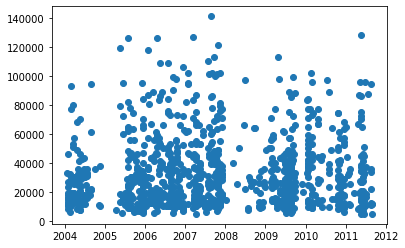

In [11]:
# Replot the same plot as above but with parsed dates
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [12]:
df.head(10)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   
5  1139255    26500.0    1001274     4605         121           3.0      2004   
6  1139256    21000.0     772701     1937         121           3.0      1993   
7  1139261    27000.0     902002     3539         121           3.0      2001   
8  1139272    21500.0    1036251    36003         121           3.0      2008   
9  1139275    65000.0    1016474     3883         121           3.0      1000   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   
5                     508.0       Low 2008-12-18  ...                     NaN   
6                   11540.0      High 2004-08-26  ...     None or Unspecified   
7                    4883.0      High 2005-11-17  ...                     NaN   
8                     302.0       Low 2009-08-27  ...     None or Unspecified   
9                   20700.0    Medium 2007-08-09  ...                     NaN   

          Stick_Length                Thumb      Pattern_Changer Grouser_Type  \
0                  NaN                  NaN                  NaN          NaN   
1                  NaN                  NaN                  NaN          NaN   
2                  NaN                  NaN                  NaN          NaN   
3                  NaN                  NaN                  NaN          NaN   
4                  NaN                  NaN                  NaN          NaN   
5                  NaN                  NaN                  NaN          NaN   
6  None or Unspecified  None or Unspecified  None or Unspecified       Double   
7                  NaN                  NaN                  NaN          NaN   
8  None or Unspecified  None or Unspecified  None or Unspecified       Double   
9                  NaN                  NaN                  NaN          NaN   

  Backhoe_Mounting Blade_Type Travel_Controls Differential_Type  \
0              NaN        NaN             NaN          Standard   
1              NaN        NaN             NaN          Standard   
2              NaN        NaN             NaN               NaN   
3              NaN        NaN             NaN               NaN   
4              NaN        NaN             NaN               NaN   
5              NaN        NaN             NaN               NaN   
6              NaN        NaN             NaN               NaN   
7              NaN        NaN             NaN               NaN   
8              NaN        NaN             NaN               NaN   
9              NaN        NaN             NaN          Standard   

  Steering_Controls  
0      Conventional  
1      Conventional  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7               NaN  
8               NaN  
9      Conventional  

[10 rows x 53 columns]

In [13]:
# Sort dataframe by sale date
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [14]:
# Make a copy of dataset with revisions
df_tmp = df.copy()

In [15]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [16]:
# Drop original 'saledate' column from dataframe
df_tmp.drop('saledate', axis=1, inplace=True)

In [17]:
df_tmp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

## Data Cleaning

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [19]:
# Change all string-value columns to category types
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype('category').cat.as_ordered()

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [21]:
# Get ratio of missing values per feature
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [22]:
# Check which columns contain missing numerical values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [23]:
# Fill missing numerical values with median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_tmp[label+'_is_missing'] = pd.isnull(content)
      df_tmp[label] = content.fillna(content.median())

In [24]:
# Turn categorical variables into numbers and fill missing values
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column indicating which categorical variables have missing values
    df_tmp[label+'_is_missing'] = pd.isnull(content)
    # Turn categories into numbers
    df_tmp[label] = pd.Categorical(content).codes + 1

In [25]:
# Check if there are any missing values left
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Instantiate Random Forest Regressor and fit it to the data

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop('SalePrice',axis=1), df_tmp['SalePrice'])

RandomForestRegressor(n_jobs=-1, random_state=42)

## Split the data into train and validation sets

In [27]:
# All values that come after 2011 will be part of the validation set
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [28]:
# Split data into X and y
X_train, y_train = df_train.drop('SalePrice', axis =1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

## Build a RMSLE evaluation function

In [29]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
            'Valid MAE': mean_absolute_error(y_valid, val_preds),
            'Training RMSLE': rmsle(y_train, train_preds),
            'Valid RMSLE': rmsle(y_valid, val_preds),
            'Training R^2': r2_score(y_train, train_preds),
            'Valid R^2': r2_score(y_valid, val_preds)}
  return scores

### Testing the model on a subset of data (in order to tune hyperparameters)

In [30]:
#Reinstantiate model on a subset
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

### Hyperparameter tuning with RandomizedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV

#Create a range of parameters to search through
rf_grid = {'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.5,1,'sqrt','auto'],
           'max_samples': [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [32]:
# Find the best model hyperparameters from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [34]:
# Reinstantiate with best parameters

best_grid = {'n_estimators': [90],
           'max_depth': [None],
           'min_samples_split': [10],
           'min_samples_leaf': [5],
           'max_features': ['auto'],
           'max_samples': [10000]}

best_rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=best_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

best_rs_model.fit(X_train, y_train)
show_scores(best_rs_model)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'Training MAE': 5790.890811781659,
 'Valid MAE': 7375.13102121858,
 'Training RMSLE': 0.2657074814439239,
 'Valid RMSLE': 0.29709206527482424,
 'Training R^2': 0.8469477247416669,
 'Valid R^2': 0.8156155831102235}

##Import Test dataset

In [48]:
test_url = "https://raw.githubusercontent.com/mikecchau/Bulldozer-time-series-price-prediction/main/Data/Test.csv"
df_test = pd.read_csv(test_url,
                      low_memory=False,
                      parse_dates=['saledate'])

In [49]:
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand   saledate fiModelDesc  ...  \
0                    3688.0       Low 2012-05-03        580G  ...   
1                   28555.0      High 2012-05-10         936  ...   
2                    6038.0    Medium 2012-05-10    EC210BLC  ...   
3                    8940.0      High 2012-05-10       330CL  ...   
4                    2286.0       Low 2012-05-10        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

###Preprocessing test dataset so that it is in the same format as the train and validation dataset

In [50]:
# Create a function to preprocess dataset

def preprocess_data(df):

  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayOfWeek'] = df.saledate.dt.dayofweek
  df['saleDayOfYear'] = df.saledate.dt.dayofyear

  df.drop('saledate', axis=1, inplace=True)

  # Fill numeric rows with median value
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label+'_is_missing'] = pd.isnull(content)
        df[label] = content.fillna(content.median())

  # Fill missing categorical data into numbers
    if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column indicating which categorical variables have missing values
      df[label+'_is_missing'] = pd.isnull(content)
    # Turn categories into numbers
      df[label] = pd.Categorical(content).codes + 1
      
  return df

In [51]:
# Preprocess test dataset
new_df_test = preprocess_data(df_test)
new_df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                               False                    False   
3                               False                    False   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2             False                       False                    False   
3             False                       False                    False   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                         True                   True   
1                         True                   True   
2                         True                   True   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                        True                          True   
1                        True                         False   
2                        True                          True   
3                        True                          True   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                          True  
4                          True  

[5 rows x 101 columns]

The test dataset is missing one column

In [52]:
# Determine which column is missing from test dataset
set(X_train.columns) - set(new_df_test.columns)

{'auctioneerID_is_missing'}

In [53]:
# Add missing column to test dataset
new_df_test['auctioneerID_is_missing'] = False

In [55]:
# Make predictions on the test data
test_preds = best_rs_model.predict(new_df_test)

In [56]:
# Format predictions
df_preds = pd.DataFrame()
df_preds['SalesID'] = new_df_test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

SalesID     SalePrice
0      1227829  19239.433633
1      1227844  26274.587963
2      1227847  54155.557760
3      1227848  80317.973986
4      1227863  41667.555115
...        ...           ...
12452  6643171  45574.812610
12453  6643173  11692.749780
12454  6643184  12243.756393
12455  6643186  15967.935935
12456  6643196  23488.474647

[12457 rows x 2 columns]

##Exploring Feature Importance

In [62]:
best_rs_model.best_estimator_.feature_importances_

array([4.51566168e-02, 1.62231776e-02, 2.75197339e-02, 4.76110600e-04,
       3.47272198e-03, 2.71830392e-01, 2.55648775e-03, 9.45809903e-04,
       2.25805749e-02, 4.69283133e-02, 6.12082226e-02, 3.14947627e-03,
       3.17510015e-03, 2.36402688e-01, 3.25499376e-02, 6.95181093e-03,
       1.56878262e-03, 1.63354862e-03, 1.39475607e-03, 2.64486880e-02,
       3.85460760e-04, 2.26735714e-04, 8.26334126e-04, 2.11670675e-04,
       7.16485380e-04, 7.32807470e-06, 9.84913101e-04, 2.47303805e-02,
       4.51580021e-04, 1.09189713e-04, 4.22943963e-03, 4.53066361e-03,
       1.79311711e-03, 4.43320239e-04, 5.94214623e-04, 2.28000418e-03,
       1.02955174e-03, 1.52983428e-02, 4.09308733e-04, 5.49236174e-04,
       1.59509061e-04, 8.45001836e-04, 1.23126786e-03, 5.80891517e-04,
       4.53449301e-04, 3.40898833e-04, 3.49518118e-05, 1.67136597e-03,
       8.02864738e-04, 1.24066688e-04, 9.04633969e-05, 6.54469203e-02,
       2.22049914e-03, 7.26082537e-03, 3.17896175e-03, 9.30288763e-03,
      

In [69]:
# Create a function to plot feature importance

def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({'features': columns,
                      'feature_importances': importances,})
                    .sort_values('feature_importances', ascending=False)
                    .reset_index(drop=True))
  
  fig, ax = plt.subplots()
  ax.barh(df['features'][:n], df['feature_importances'][:20])
  ax.set_ylabel('Features')
  ax.set_xlabel('Feature importance')
  ax.invert_yaxis()

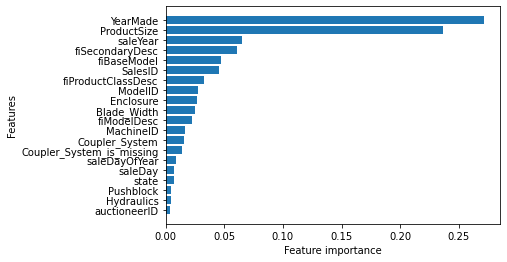

In [70]:
plot_features(X_train.columns, best_rs_model.best_estimator_.feature_importances_)